# Assignment Part-I
#### `Prediction of the actual value of the prospective properties`

## Business Objective

A US-based housing company named Surprise Housing has decided to enter the Australian market. 

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house
* How well those variables describe the price of a house

In [1]:
# Note that all source file to be placed under the data folder in present directory.
import os
os.getcwd()


'C:\\Users\\pc\\Documents\\suhani\\Assigments\\House Price Prediction'

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing pandas and numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [4]:
#reading loan.csv
df = pd.read_csv(filepath_or_buffer="train.csv", low_memory=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Droping Id as it is not important variable
df.drop(columns="Id",inplace=True)

### Treating the null values

In [8]:
# Evaulate missing data in terms of percentage
Isnull = df.isnull().sum()/len(df)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Analysing the columns with more then 40% null values

In [9]:
col=list(Isnull[Isnull>40].index)
for c in col:
 print(df[c].value_counts())

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


#### The categories are not well distributed hence droping all the columns with Null vlaue more the 40%

In [10]:
df.drop(columns=col,inplace=True)
df.shape

(1460, 75)

### Analysing the columns with more then 0% null values

In [11]:
Isnull = df.isnull().sum()/len(df)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [12]:
col=list(Isnull[Isnull>0].index)
for c in col:
 print(df[c].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dt

#### Imputing the missing values in rest of the columns

In [13]:
#imputing the median into the null values if LotFrontage
df['LotFrontage']=df["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [14]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

In [15]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col] = df[col].fillna(int(0))

In [16]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    df[col] = df[col].fillna('None')

In [17]:
#MasVnrArea : replace with zero
df['MasVnrArea'] = df['MasVnrArea'].fillna(int(0))

In [18]:
#MasVnrType : replace with None
df['MasVnrType'] = df['MasVnrType'].fillna('None')


In [19]:
#There is put mode value 
df['Electrical'] = df['Electrical'].fillna(df['Electrical']).mode()[0]

In [20]:
Isnull = df.isnull().sum()/len(df)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

Series([], dtype: float64)

In [21]:
#Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
df['DiffYearBuilt'] = pd.datetime.now().year - df['YearBuilt']
df['DiffYearRemodAdd'] = pd.datetime.now().year - df['YearRemodAdd']
df['DiffGarageYrBlt'] = pd.datetime.now().year - df['GarageYrBlt']

In [22]:
#removing all columns which one unique value throughout the dataframe
df.drop(columns=df.columns[df.nunique()==1], inplace=True)
df.shape

(1460, 77)

#### There is no null values
### EDA

In [23]:
#Numerical Variables:
num_col=df.select_dtypes(include=[np.number]).columns

#Categorical Variables:
cat_col=df.select_dtypes(include=[np.object]).columns

print("Numerical Variables",num_col)
print("Categorical Variables",cat_col)

#output Column
out_col="SalePrice"
print("Output Column",out_col)

Numerical Variables Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'DiffYearBuilt', 'DiffYearRemodAdd',
       'DiffGarageYrBlt'],
      dtype='object')
Categorical Variables Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       '

### Analysing Target Variable

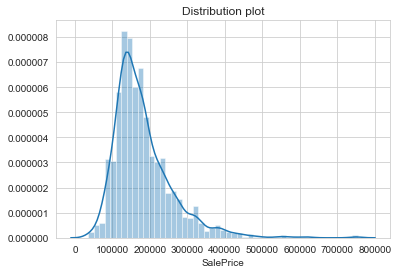

In [24]:
#Distribution plot of Traget Variable
sns.set_style(style="whitegrid")
sns.distplot(df["SalePrice"])
plt.title("Distribution plot")
plt.show()

#### As you can see the above graph are left or positive skewed. Which means people are more interested in small budget houses or in other word less people can afford expensive houses.

In [25]:
# Function for Analysis of Numerical column
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=df[[col_i,col_o]])

In [26]:
# Function for Analysis of Categorical column
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = df[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df[[col_i,col_o]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

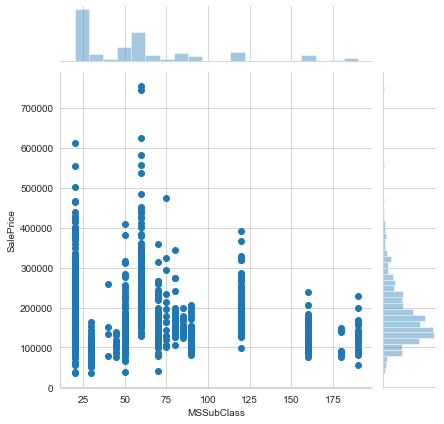

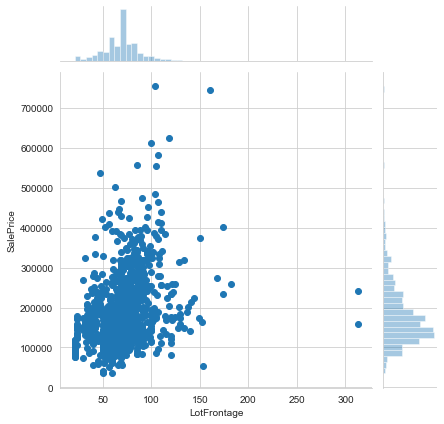

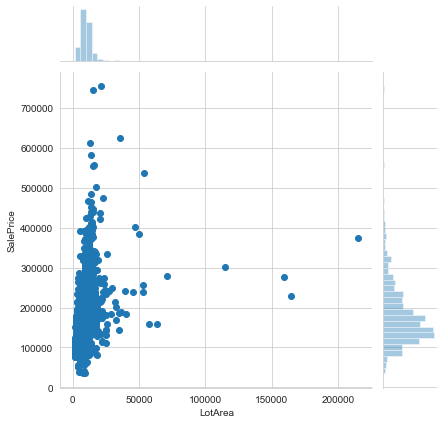

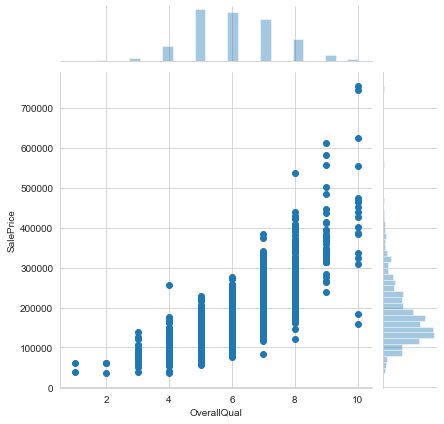

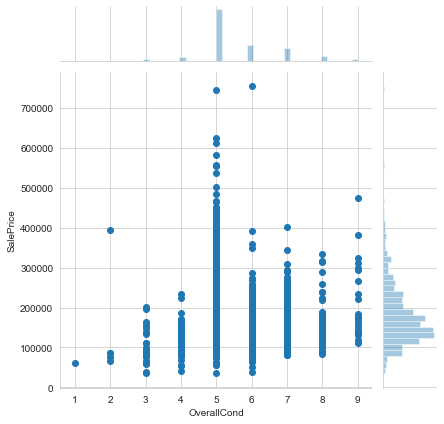

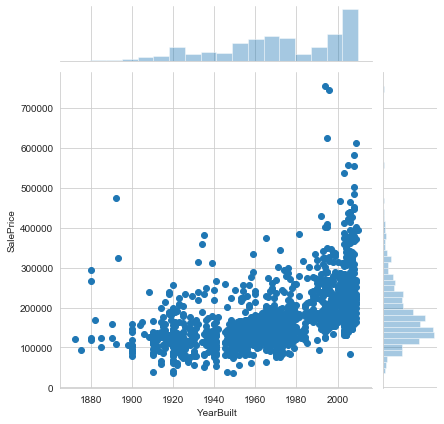

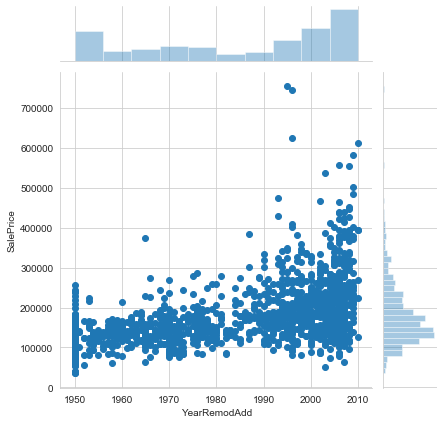

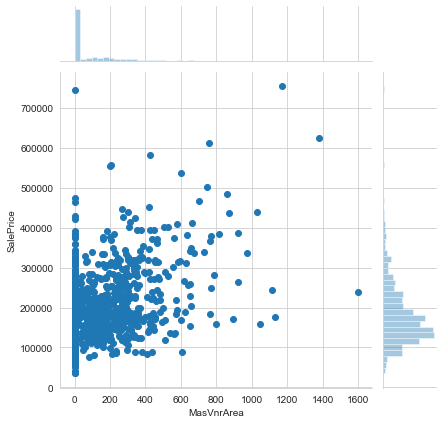

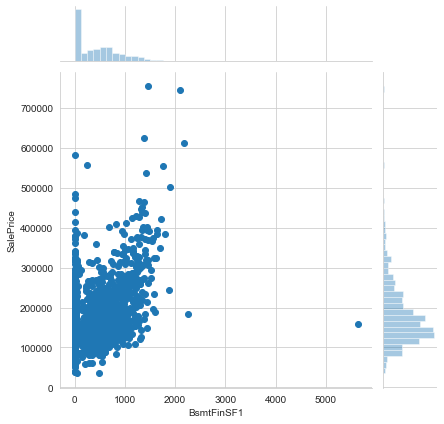

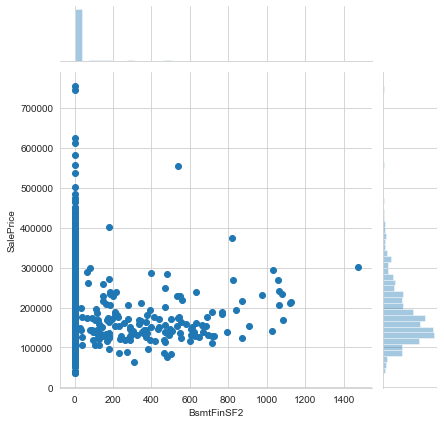

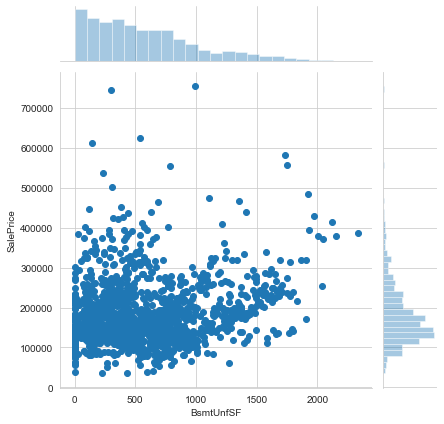

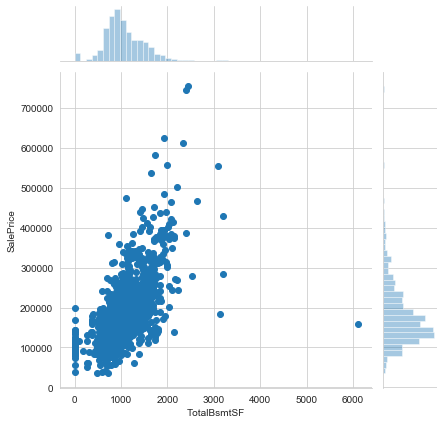

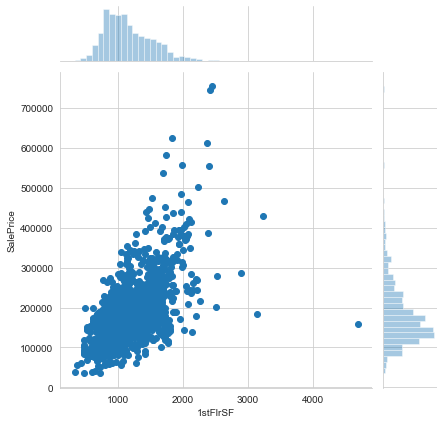

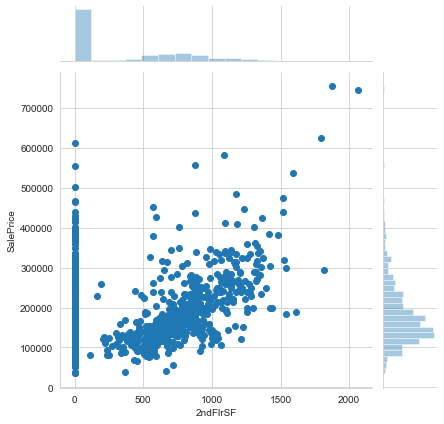

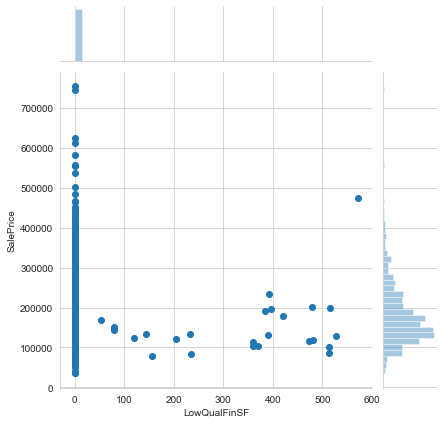

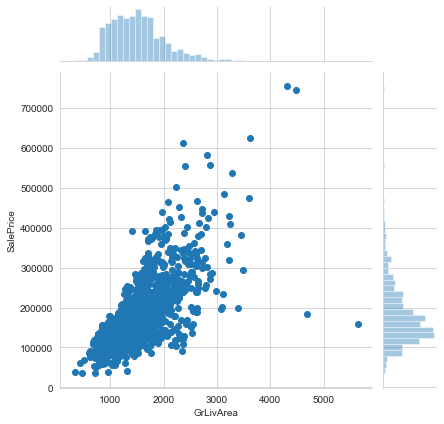

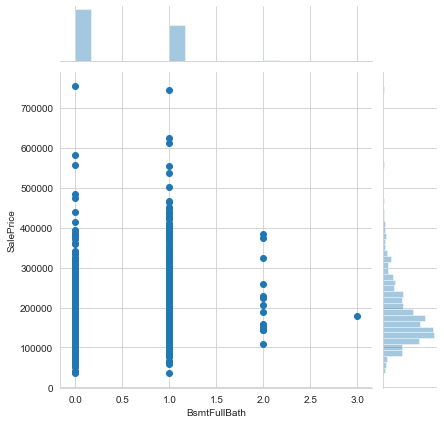

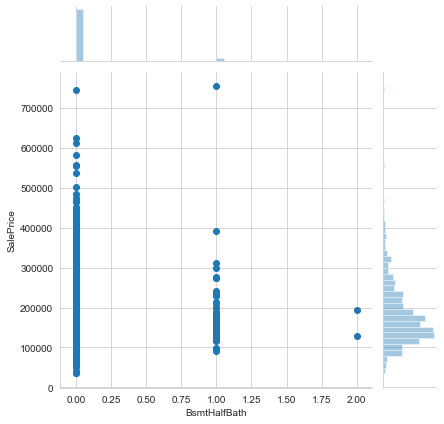

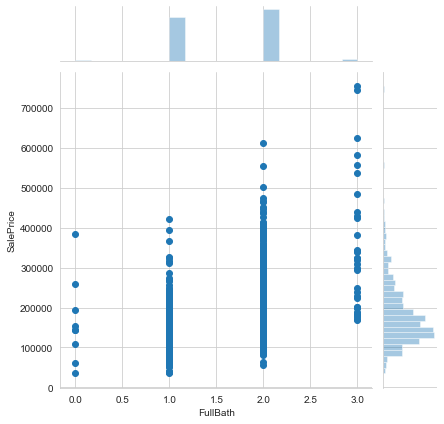

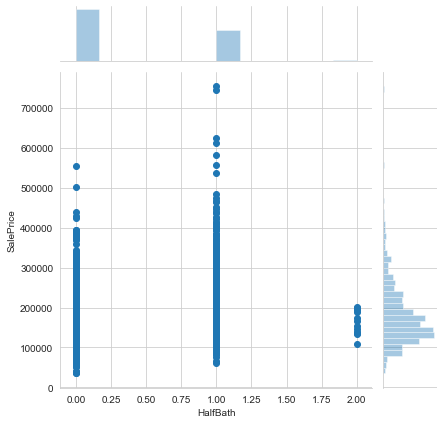

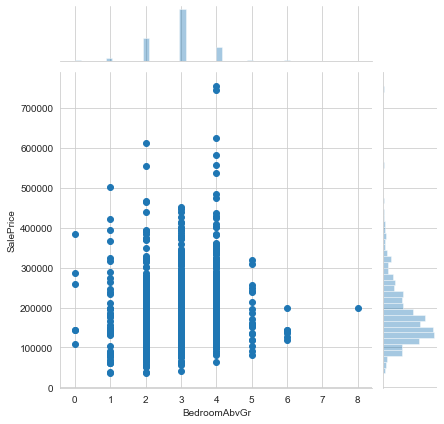

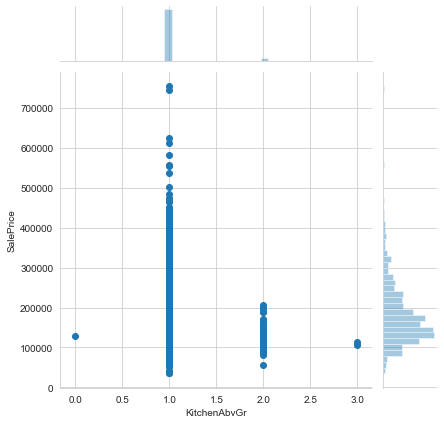

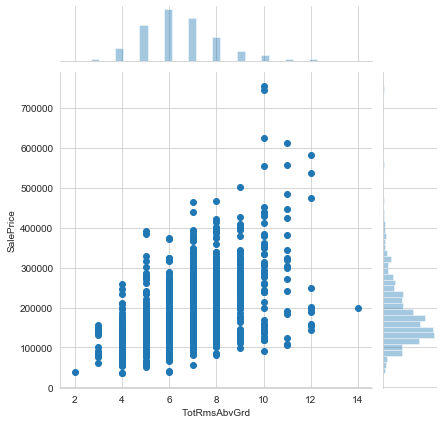

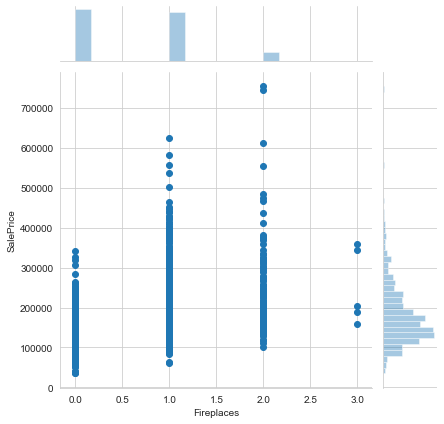

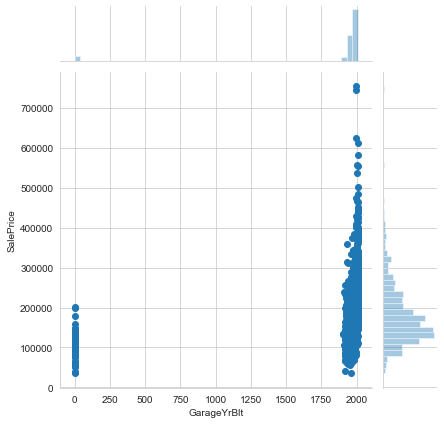

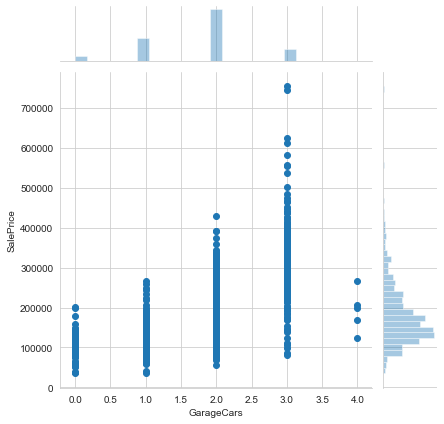

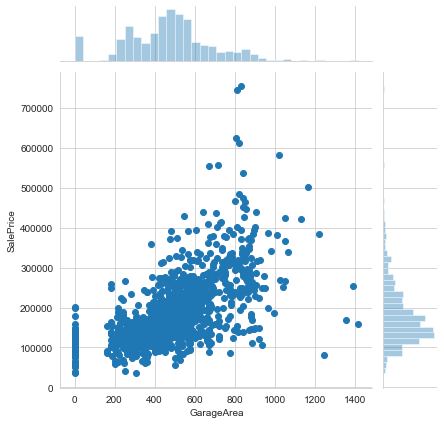

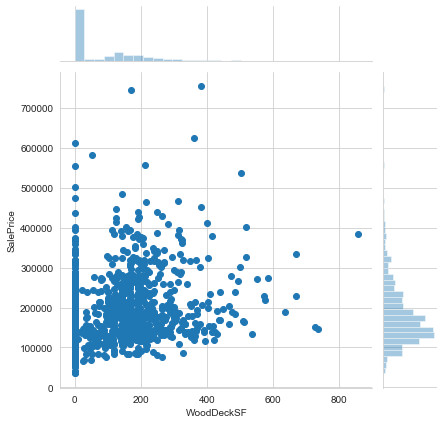

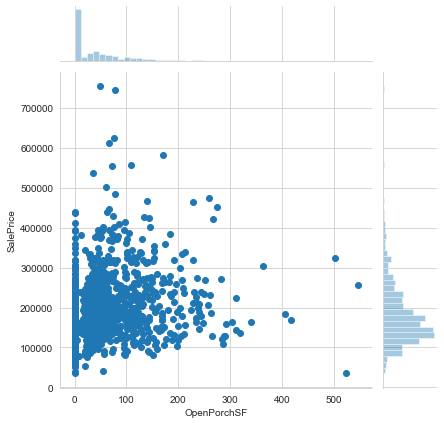

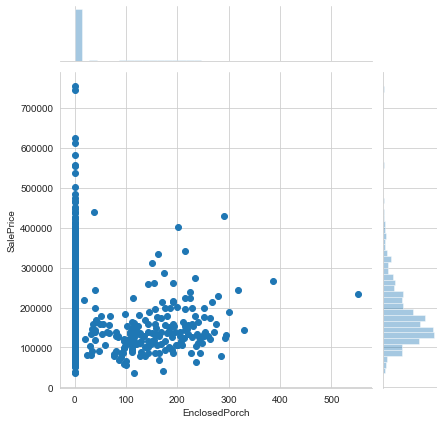

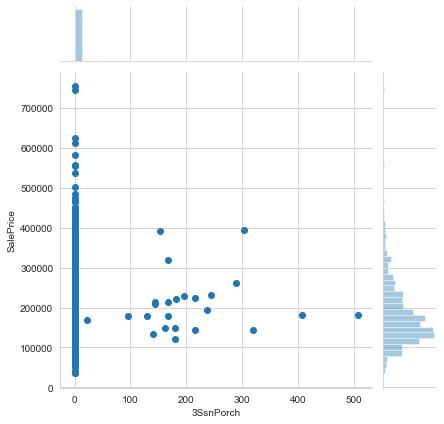

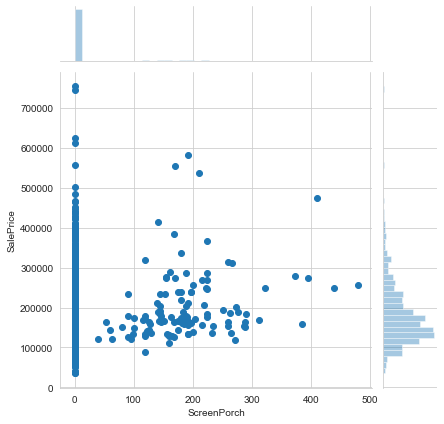

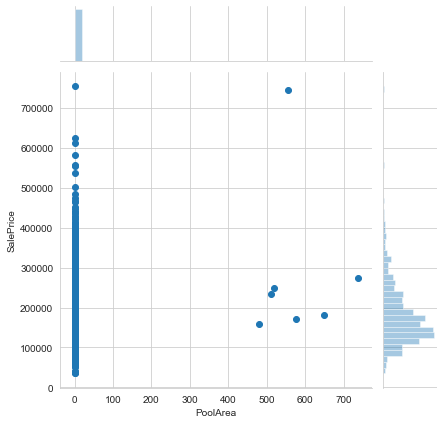

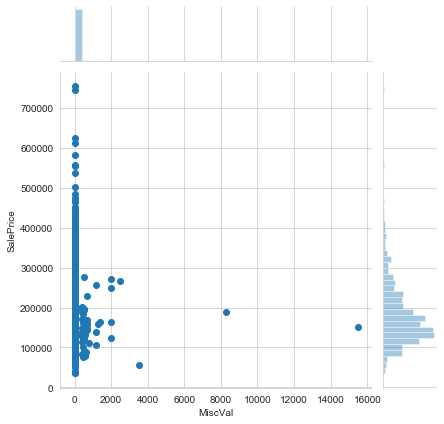

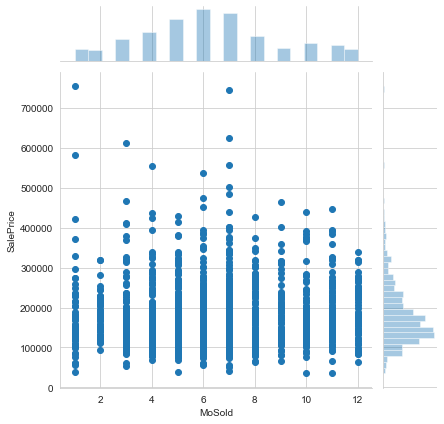

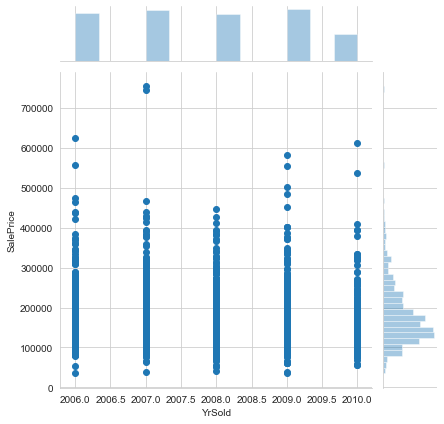

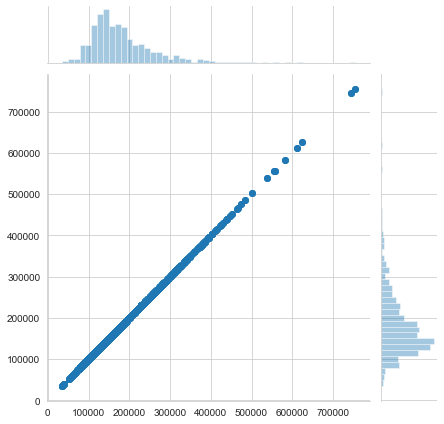

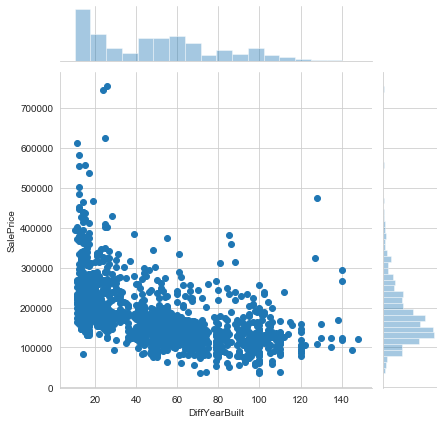

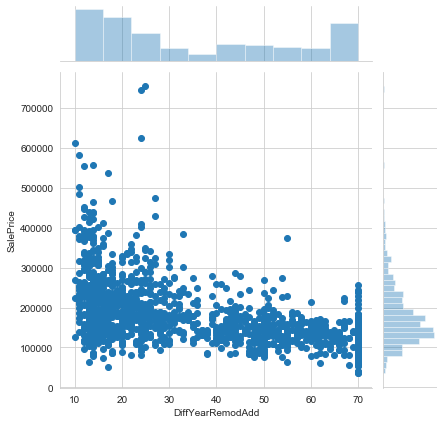

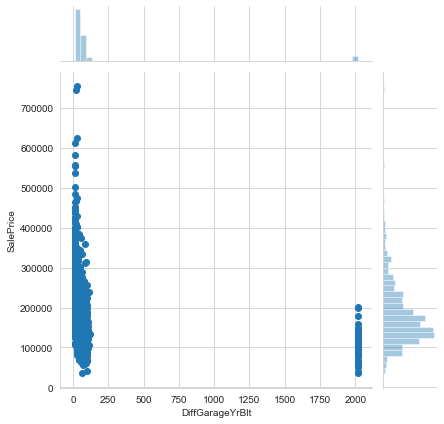

In [27]:
# NUMERICAL COLUMN ANALYSIS
for i, col in enumerate(num_col):
    num_col_analysis(i, col, out_col)

<Figure size 432x288 with 0 Axes>

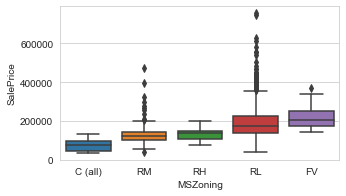

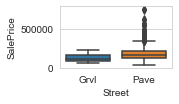

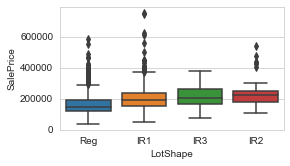

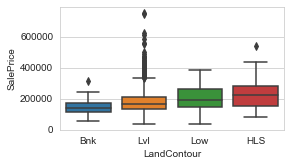

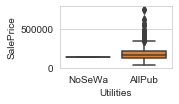

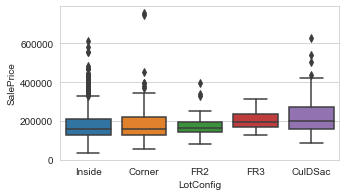

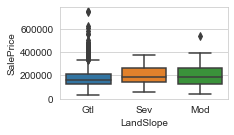

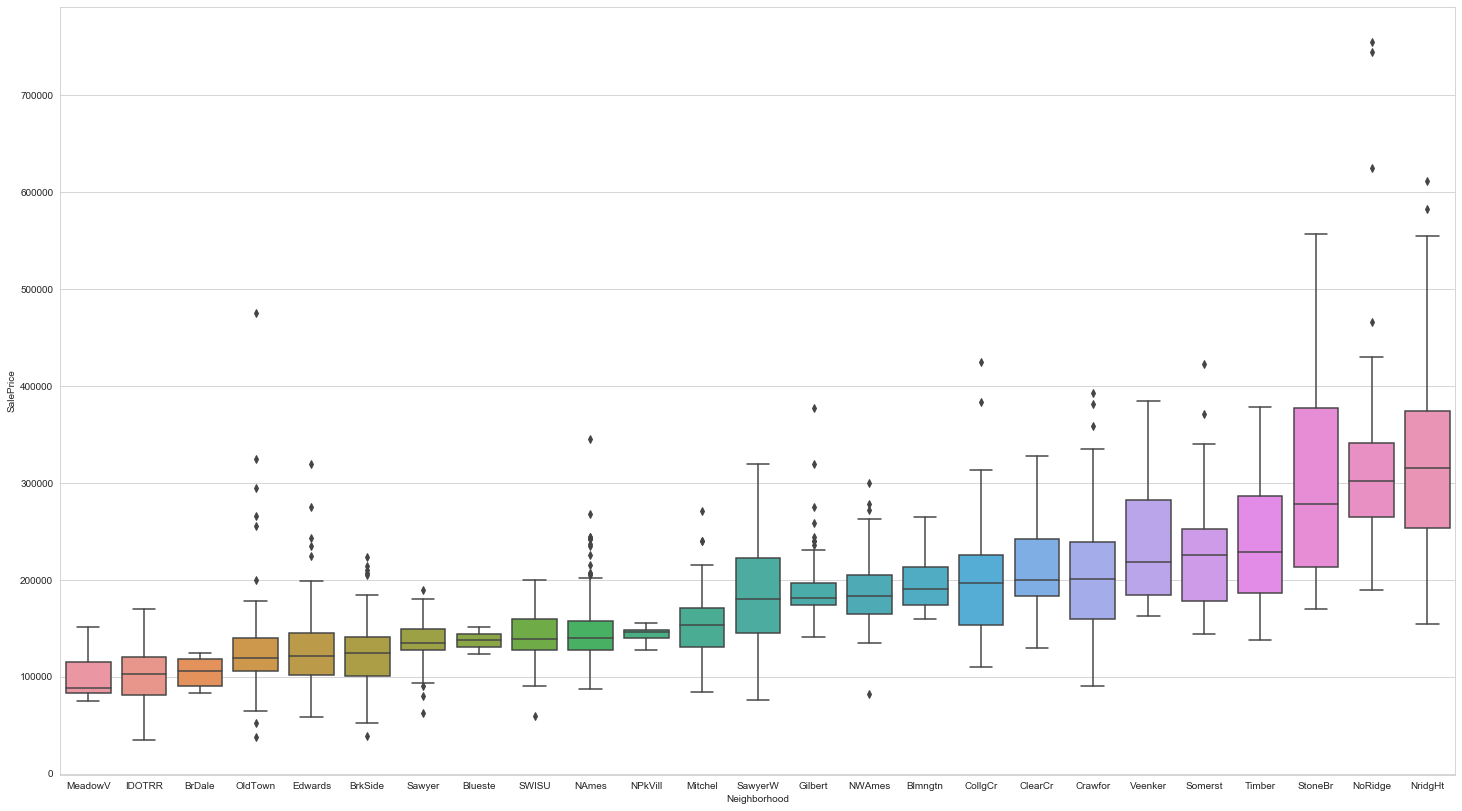

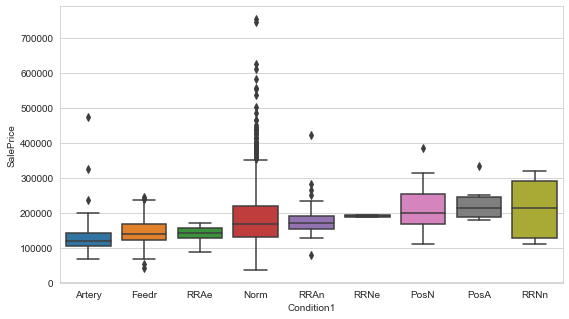

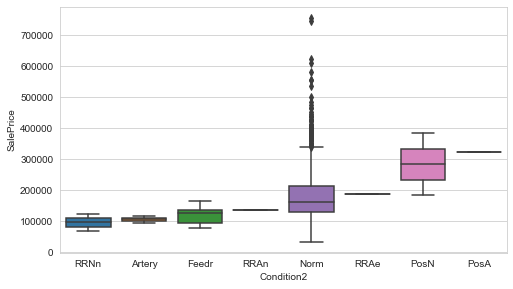

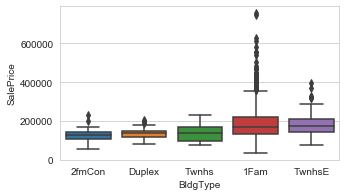

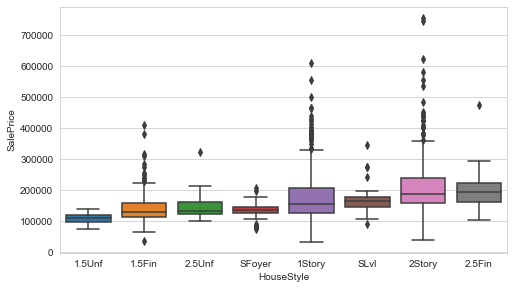

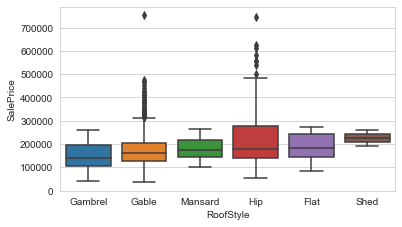

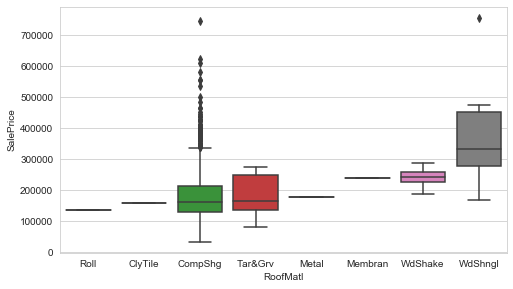

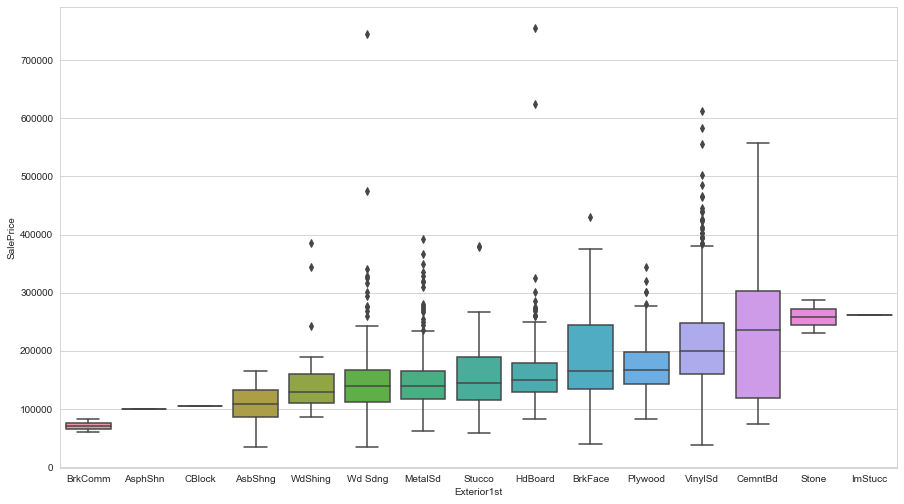

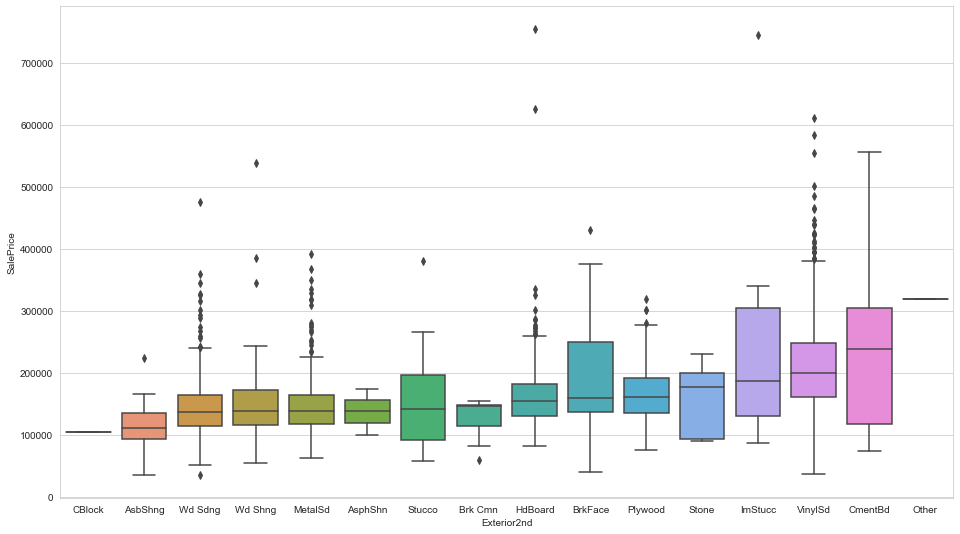

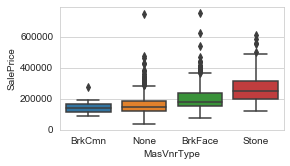

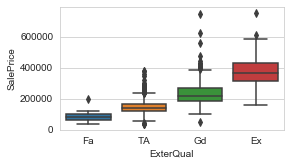

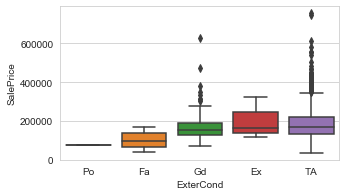

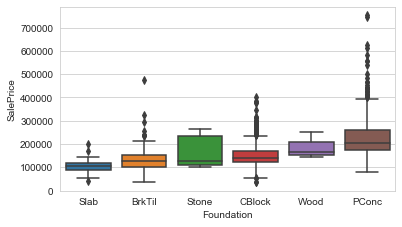

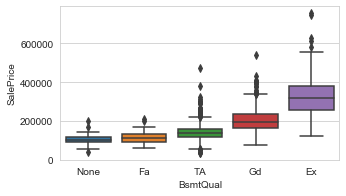

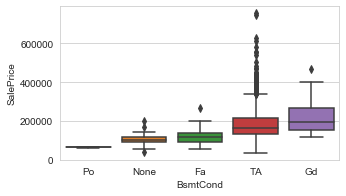

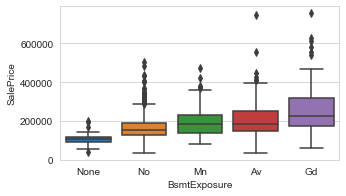

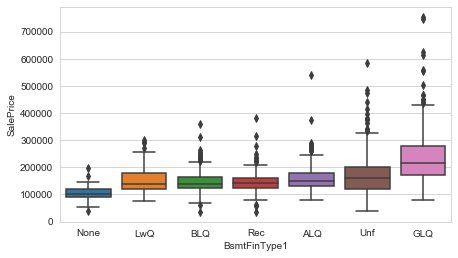

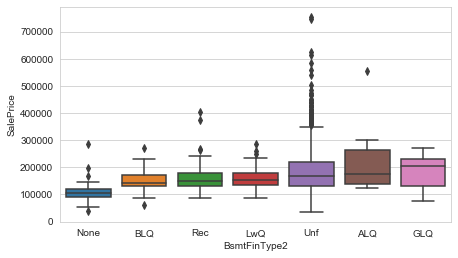

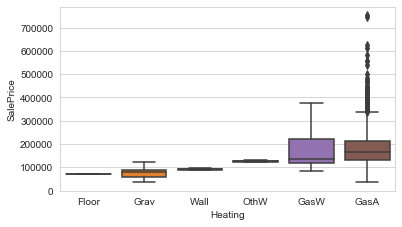

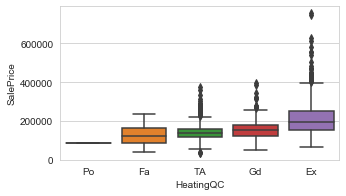

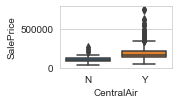

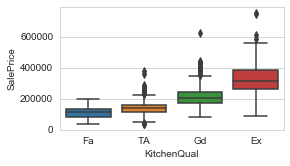

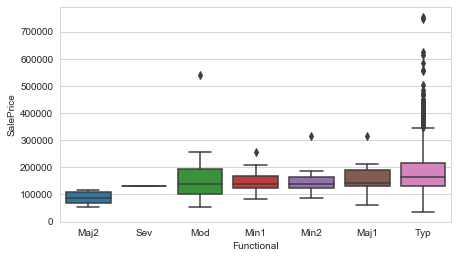

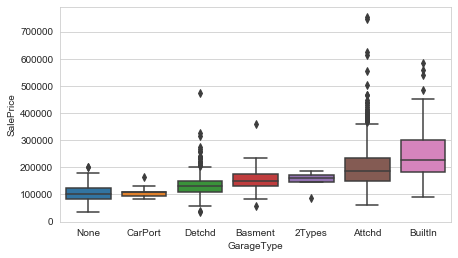

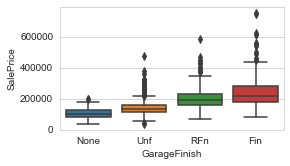

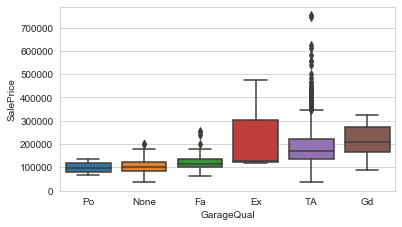

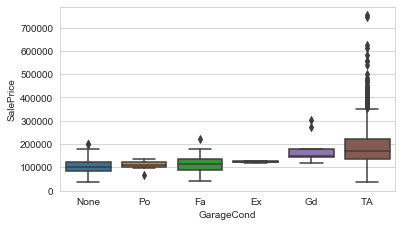

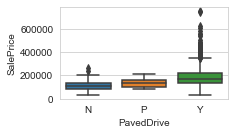

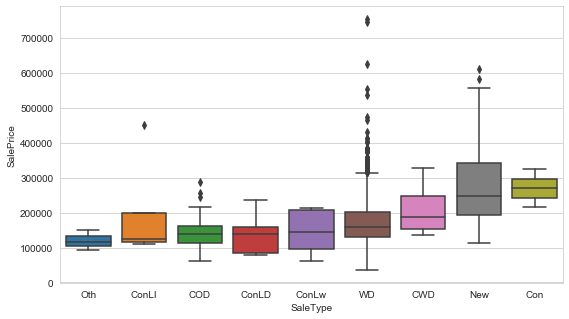

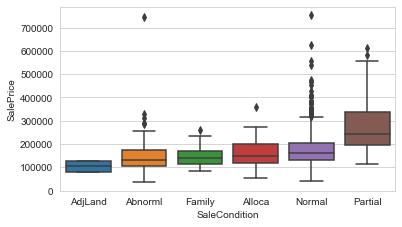

In [28]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, out_col)

### Corelation Heat Map of Numerical Variable

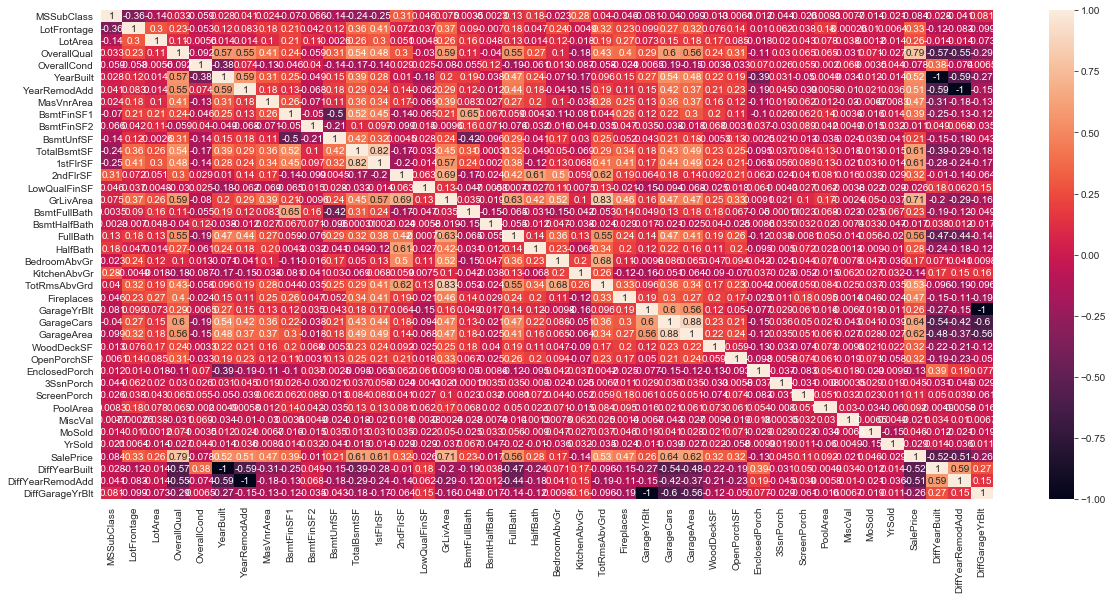

In [29]:
#Coralation plot
num_corr = df.select_dtypes(include=[np.number])
corr = num_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

#### Top 50% Corralation train attributes with sale-price

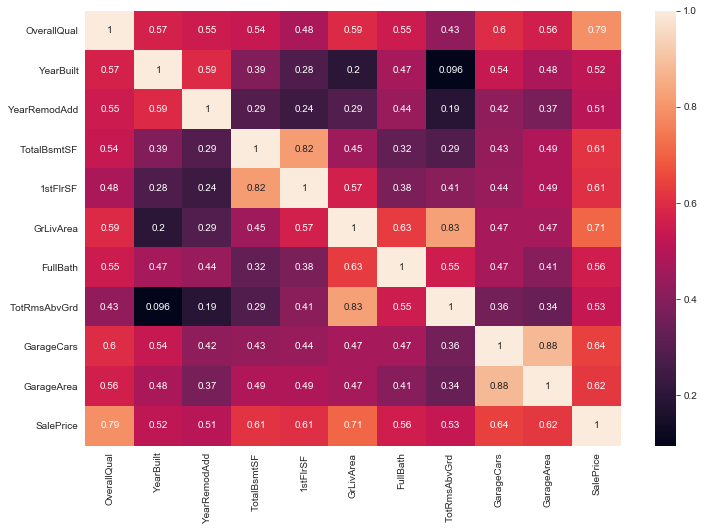

In [30]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

#### Here OverallQual is highly correlated with target feature of saleprice by 79%

## Dumify Categorical Fields

In [31]:
# Dumifying all columns using a loop
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(df[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    df = pd.concat([df, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    df.drop([col], axis = 1, inplace = True)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


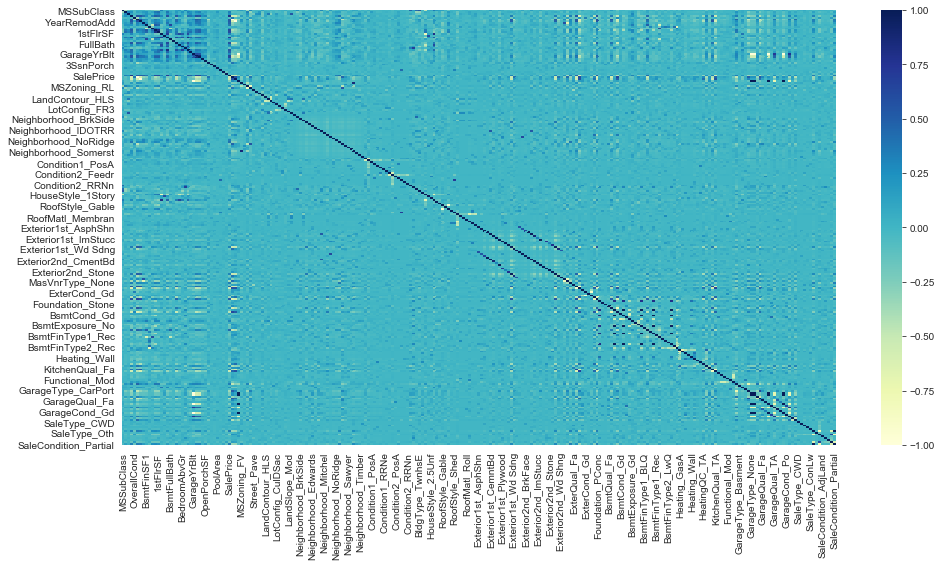

In [32]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

## Data Preparation for Modelling


In [33]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(df[num_col]))
# Outlier Removed Records
selected = df[num_col][(z < 3).all(axis=1)]
df = df.loc[selected.index]
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,0,1,0,0,0,1,0
10,20,70.0,11200,5,5,1965,1965,0.0,906,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,20,78.0,9262,8,5,2008,2009,194.0,0,0,...,0,0,1,0,0,0,0,0,0,1
1452,180,35.0,3675,5,5,2005,2005,80.0,547,0,...,0,0,0,0,1,0,0,0,1,0
1454,20,62.0,7500,7,5,2004,2005,0.0,410,0,...,0,0,0,0,1,0,0,0,1,0
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [34]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [35]:
# Preparing Test and Train Set

y = df.loc[:, out_col]
X = df.loc[:, df.columns != out_col]

# scale
scaler = StandardScaler()
scaler.fit(X)

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

## Liner Regression Model

In [36]:
#linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9507236118507876
0.9056031829383834


In [37]:
# model coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -692841.55),
 ('MSSubClass', -300.58),
 ('LotFrontage', -8.14),
 ('LotArea', 1.06),
 ('OverallQual', 5950.84),
 ('OverallCond', 6299.35),
 ('YearBuilt', 121.95),
 ('YearRemodAdd', 70.65),
 ('MasVnrArea', 6.01),
 ('BsmtFinSF1', 15.03),
 ('BsmtFinSF2', 6.85),
 ('BsmtUnfSF', 1.3),
 ('TotalBsmtSF', 23.18),
 ('1stFlrSF', -2.73),
 ('2ndFlrSF', 31.36),
 ('LowQualFinSF', 21.97),
 ('GrLivArea', 50.61),
 ('BsmtFullBath', 1904.5),
 ('BsmtHalfBath', -0.0),
 ('FullBath', -3139.26),
 ('HalfBath', -2722.95),
 ('BedroomAbvGr', -2509.23),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', -1071.32),
 ('Fireplaces', 3071.19),
 ('GarageYrBlt', 9.7),
 ('GarageCars', 6407.08),
 ('GarageArea', 14.42),
 ('WoodDeckSF', 25.93),
 ('OpenPorchSF', 16.93),
 ('EnclosedPorch', 14.14),
 ('3SsnPorch', -794.86),
 ('ScreenPorch', 41.87),
 ('PoolArea', 0.0),
 ('MiscVal', 5.04),
 ('MoSold', 342.79),
 ('YrSold', 95.45),
 ('DiffYearBuilt', -121.95),
 ('DiffYearRemodAdd', -70.65),
 ('DiffGarageYrBlt', -9.7),
 ('MSZonin

Text(0, 0.5, 'y_test_pred')

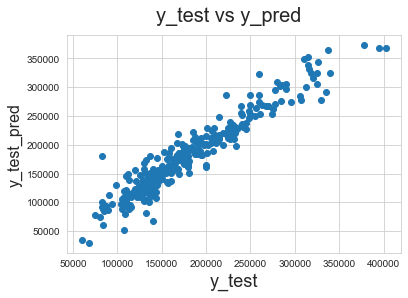

In [38]:
#Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

## Ridge Regression Model

In [39]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [40]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


model = Ridge()

# cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
model_cv = GridSearchCV(estimator = model, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    4.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.073871,0.113333,0.003996,0.001410,0.0001,{'alpha': 0.0001},0.874902,0.843743,0.873243,0.861688,...,0.870331,0.017781,26,0.954686,0.960155,0.951004,0.960142,0.950442,0.955286,0.004230
1,0.009393,0.001018,0.002398,0.000492,0.001,{'alpha': 0.001},0.875260,0.844961,0.874409,0.861686,...,0.870958,0.017603,25,0.954685,0.960152,0.951004,0.960142,0.950442,0.955285,0.004229
2,0.009595,0.001852,0.002198,0.000400,0.01,{'alpha': 0.01},0.877835,0.851600,0.881086,0.861757,...,0.874743,0.017126,24,0.954663,0.960039,0.950973,0.960125,0.950430,0.955246,0.004209
3,0.011190,0.002553,0.002796,0.000747,0.05,{'alpha': 0.05},0.883679,0.859643,0.888589,0.862923,...,0.880223,0.017226,23,0.954510,0.959697,0.950795,0.959988,0.950297,0.955057,0.004171
4,0.009594,0.001494,0.003398,0.000800,0.1,{'alpha': 0.1},0.887836,0.863727,0.892053,0.864276,...,0.883279,0.017189,22,0.954290,0.959424,0.950556,0.959771,0.950091,0.954827,0.004160


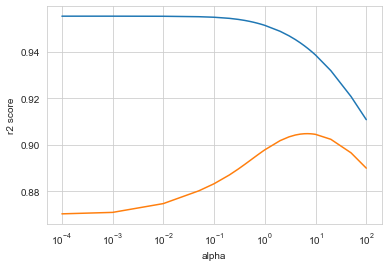

In [42]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

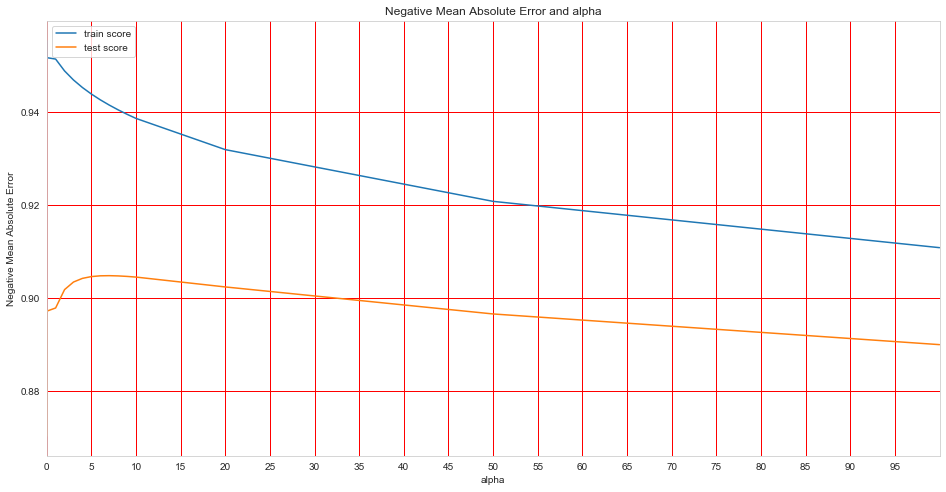

In [43]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

The value of alpha should be 4 

In [44]:
from sklearn import linear_model
rm =Ridge(alpha=4)
rm.fit(X_train, y_train)

# predict
y_train_pred = rm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = rm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9426064615722712
0.9280521583119766


In [45]:
# Ridge model parameters
model_parameters = list(rm.coef_)
model_parameters.insert(0, rm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-733117.454, 'constant'),
 (19922.998, 'Neighborhood_StoneBr'),
 (16218.515, 'Neighborhood_Crawfor'),
 (-13766.646, 'KitchenQual_Gd'),
 (13289.173, 'Functional_Typ'),
 (13227.659, 'Neighborhood_NridgHt'),
 (-12952.527, 'SaleCondition_Alloca'),
 (-12235.252, 'BsmtQual_Gd'),
 (-11981.48, 'ExterQual_TA'),
 (11620.391, 'MSZoning_FV'),
 (11609.14, 'SaleCondition_Partial'),
 (-11381.821, 'KitchenQual_TA'),
 (10535.754, 'LandContour_HLS'),
 (-10178.09, 'Neighborhood_Edwards'),
 (-10052.487, 'Neighborhood_Mitchel'),
 (9872.501, 'Condition1_Norm'),
 (-9814.905, 'KitchenQual_Fa'),
 (-9808.045, 'BsmtQual_TA'),
 (-9739.434, 'Neighborhood_OldTown'),
 (9319.617, 'BsmtExposure_Gd'),
 (-9152.79, 'Functional_Mod'),
 (-9150.891, 'ExterQual_Gd'),
 (9149.997, 'Street_Pave'),
 (-8841.493, 'Neighborhood_NAmes'),
 (8702.972, 'Neighborhood_NoRidge'),
 (-8232.894, 'Neighborhood_CollgCr'),
 (-8100.11, 'Condition1_PosA'),
 (8052.325, 'Neighborhood_BrDale'),
 (7744.081, 'Condition1_PosN'),
 (7646.663, 'BsmtFinT

Text(0, 0.5, 'y_test_pred')

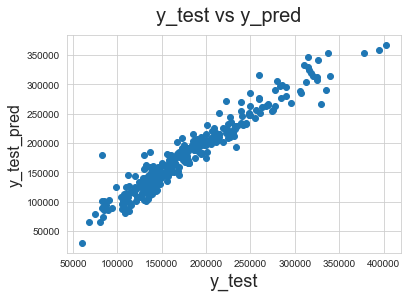

In [46]:
#Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

### Lasso Regression Model

In [47]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [1.0, 5.0, 10.0, 15.0, 20.0,30,50,100]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 5.0, 10.0, 15.0, 20.0, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.432231,0.087515,0.006597,0.002576,1,{'alpha': 1.0},0.881214,0.855655,0.887420,0.859243,...,0.877258,0.017666,8,0.954572,0.959832,0.950865,0.960076,0.950400,0.955149,0.004182
1,0.440028,0.226970,0.003998,0.000894,5,{'alpha': 5.0},0.890146,0.866513,0.893371,0.864828,...,0.885433,0.017833,7,0.953949,0.959098,0.950332,0.959440,0.949791,0.954522,0.004133
2,0.425757,0.069052,0.005597,0.001495,10,{'alpha': 10.0},0.896208,0.872910,0.896231,0.869763,...,0.890059,0.016812,6,0.952626,0.957952,0.949171,0.958171,0.948486,0.953281,0.004148
3,0.332410,0.020895,0.003797,0.001326,15,{'alpha': 15.0},0.901297,0.877588,0.898475,0.872187,...,0.893994,0.017417,5,0.951462,0.956662,0.947905,0.956805,0.947301,0.952027,0.004098
4,0.329966,0.061141,0.004286,0.001235,20,{'alpha': 20.0},0.905178,0.880609,0.903482,0.872600,...,0.897297,0.018628,4,0.950283,0.955348,0.946890,0.955607,0.946056,0.950837,0.004046


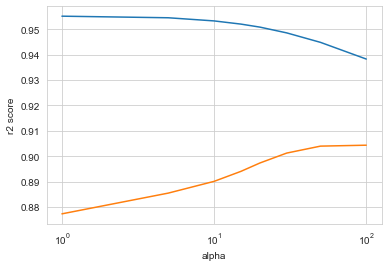

In [49]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

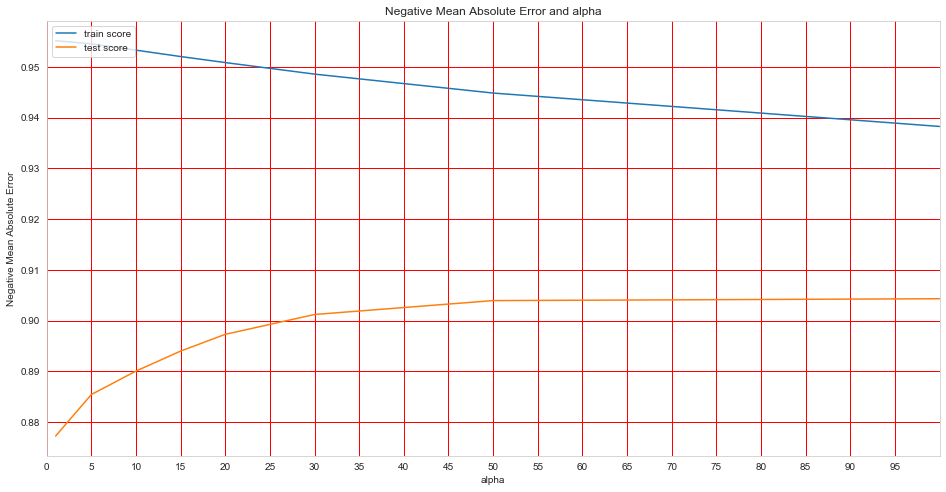

In [50]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

The value of alpha shoulb be 50

In [51]:
# lasso regression
from sklearn import linear_model
lam =Lasso(alpha=50)
lam.fit(X_train, y_train)

# predict
y_train_pred = lam.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lam.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9409539655625259
0.9279279220834611


In [52]:
# lasso model parameters
model_parameters = list(lam.coef_)
model_parameters.insert(0, lam.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1879137.118, 'constant'),
 (-33990.005, 'SaleCondition_Alloca'),
 (30322.859, 'Neighborhood_StoneBr'),
 (22121.016, 'Neighborhood_Crawfor'),
 (-16761.912, 'KitchenQual_Gd'),
 (16003.726, 'Functional_Typ'),
 (15369.601, 'Neighborhood_NridgHt'),
 (-14754.8, 'KitchenQual_TA'),
 (-13413.516, 'BsmtQual_Gd'),
 (13337.974, 'MSZoning_FV'),
 (13335.85, 'SaleCondition_Partial'),
 (12624.339, 'Neighborhood_NoRidge'),
 (-11851.785, 'KitchenQual_Fa'),
 (-11260.998, 'ExterQual_TA'),
 (-11000.237, 'BsmtQual_TA'),
 (10110.32, 'BsmtExposure_Gd'),
 (9857.136, 'Condition1_Norm'),
 (9453.4, 'LandContour_HLS'),
 (-8824.217, 'Neighborhood_OldTown'),
 (-8338.53, 'Neighborhood_Mitchel'),
 (-8234.126, 'ExterQual_Gd'),
 (8062.356, 'Exterior1st_BrkFace'),
 (-7694.126, 'Neighborhood_Edwards'),
 (7212.586, 'OverallQual'),
 (7174.094, 'BsmtFinType1_GLQ'),
 (-6543.014, 'Condition1_PosA'),
 (6455.405, 'Condition1_PosN'),
 (6256.797, 'Neighborhood_BrDale'),
 (6203.647, 'OverallCond'),
 (-6095.837, 'Neighborhood_NAm

Text(0, 0.5, 'y_test_pred')

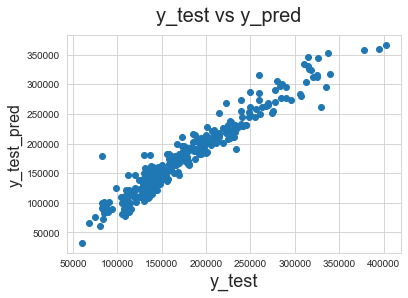

In [53]:
#Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

## Conclusion

Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.
Simple Linear Regression model is fairly complex, hence we would not consider that.
Ridge Regression model is fairly complex, hence we would not consider that.
Optimum value of lambda for Ridge Regression is 10
Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.
Optimum value of lambda for Lasso Regression is 100

In [54]:
print("Most important 30 features that are affecting Sales pricing are:")
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')
    

Most important 30 features that are affecting Sales pricing are:
SaleCondition_Alloca                    Score: -33990.005
Neighborhood_StoneBr                    Score: 30322.859
Neighborhood_Crawfor                    Score: 22121.016
KitchenQual_Gd                          Score: -16761.912
Functional_Typ                          Score: 16003.726
Neighborhood_NridgHt                    Score: 15369.601
KitchenQual_TA                          Score: -14754.8
BsmtQual_Gd                             Score: -13413.516
MSZoning_FV                             Score: 13337.974
SaleCondition_Partial                   Score: 13335.85
Neighborhood_NoRidge                    Score: 12624.339
KitchenQual_Fa                          Score: -11851.785
ExterQual_TA                            Score: -11260.998
BsmtQual_TA                             Score: -11000.237
BsmtExposure_Gd                         Score: 10110.32
Condition1_Norm                         Score: 9857.136
LandContour_HLS      

From our initial set of columns, few of the major influencers for Sales Pricing are: 
1. SaleCondition
2. Neighborhood
3. KitchenQual
4. Functional
5. BsmtQual
6. MSZoning
7. LandContour
8. ExterQual
9. Exterior1st
10. OverallQual 